In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_movies = pd.read_csv(r"movies.dat", sep='::', engine='python', encoding='latin1',names = ['MovieID','Title','Genre'])
df_ratings = pd.read_csv(r"ratings.dat.",sep='::', engine='python',encoding='latin1')
df_ratings.columns =['UserID', 'MovieID', 'Rating', 'Timestamp']
df_users = pd.read_csv(r"users.dat",sep='::',engine='python',encoding='latin1')
df_users.columns =['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code']

In [3]:
df_movies.head()

,MovieID,Title,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
df_ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [5]:
df_users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


In [6]:
df_movies.shape

(3883, 3)

In [7]:
df_movies.value_counts()

MovieID  Title                                    Genre                        
1        Toy Story (1995)                         Animation|Children's|Comedy      1
2677     Buena Vista Social Club (1999)           Documentary                      1
2649     Son of Frankenstein (1939)               Horror                           1
2650     Ghost of Frankenstein, The (1942)        Horror                           1
2651     Frankenstein Meets the Wolf Man (1943)   Horror                           1
                                                                                  ..
1319     Kids of Survival (1993)                  Documentary                      1
1320     Alien³ (1992)                            Action|Horror|Sci-Fi|Thriller    1
1321     American Werewolf in London, An (1981)   Horror                           1
1322     Amityville 1992: It's About Time (1992)  Horror                           1
3952     Contender, The (2000)                    Drama|Thriller      

In [8]:
df_ratings.shape

(1000208, 4)

In [9]:
df_users.shape

(6039, 5)

In [10]:
df_movies.isna().sum()

MovieID    0
Title      0
Genre      0
dtype: int64

In [11]:
df_ratings.isna().sum()

UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64

In [12]:
df_users.isna().sum()

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

In [13]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_users['Gender']= labelencoder.fit_transform(df_users['Gender'])
df_users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,2,1,56,16,70072
1,3,1,25,15,55117
2,4,1,45,7,02460
3,5,1,25,20,55455
4,6,0,50,9,55117


In [14]:
#Concatenating the datasets for combining the 3 datasets of movies,users and rating
df_m=pd.concat([df_movies,df_ratings,df_users],axis=1)
df_m.head()

,MovieID,Title,Genre,UserID,MovieID,Rating,Timestamp,UserID,Gender,Age,Occupation,Zip-code
0,1.0,Toy Story (1995),Animation|Children's|Comedy,1,661,3,978302109,2.0,1.0,56.0,16.0,70072
1,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,914,3,978301968,3.0,1.0,25.0,15.0,55117
2,3.0,Grumpier Old Men (1995),Comedy|Romance,1,3408,4,978300275,4.0,1.0,45.0,7.0,02460
3,4.0,Waiting to Exhale (1995),Comedy|Drama,1,2355,5,978824291,5.0,1.0,25.0,20.0,55455
4,5.0,Father of the Bride Part II (1995),Comedy,1,1197,3,978302268,6.0,0.0,50.0,9.0,55117


In [15]:
df_m.shape

(1000208, 12)

In [16]:
df_m.isna().sum()

MovieID       996325
Title         996325
Genre         996325
UserID             0
MovieID            0
Rating             0
Timestamp          0
UserID        994169
Gender        994169
Age           994169
Occupation    994169
Zip-code      994169
dtype: int64

In [17]:
df_m.value_counts

<bound method DataFrame.value_counts of          MovieID                               Title  \
0            1.0                    Toy Story (1995)   
1            2.0                      Jumanji (1995)   
2            3.0             Grumpier Old Men (1995)   
3            4.0            Waiting to Exhale (1995)   
4            5.0  Father of the Bride Part II (1995)   
...          ...                                 ...   
1000203      NaN                                 NaN   
1000204      NaN                                 NaN   
1000205      NaN                                 NaN   
1000206      NaN                                 NaN   
1000207      NaN                                 NaN   

                                Genre  UserID  MovieID  Rating  Timestamp  \
0         Animation|Children's|Comedy       1      661       3  978302109   
1        Adventure|Children's|Fantasy       1      914       3  978301968   
2                      Comedy|Romance       1     3408  

In [18]:
# Droping unwanted columns
df_d=df_m.drop(["Occupation","Zip-code","Timestamp"],axis=1)

In [19]:
df_d.head()

,MovieID,Title,Genre,UserID,MovieID,Rating,UserID,Gender,Age
0,1.0,Toy Story (1995),Animation|Children's|Comedy,1,661,3,2.0,1.0,56.0
1,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,914,3,3.0,1.0,25.0
2,3.0,Grumpier Old Men (1995),Comedy|Romance,1,3408,4,4.0,1.0,45.0
3,4.0,Waiting to Exhale (1995),Comedy|Drama,1,2355,5,5.0,1.0,25.0
4,5.0,Father of the Bride Part II (1995),Comedy,1,1197,3,6.0,0.0,50.0


In [20]:
# Handling missing values
df_final=df_d.dropna()

In [21]:

df_final.shape

(3883, 9)

In [22]:
df_final.dtypes

MovieID    float64
Title       object
Genre       object
UserID       int64
MovieID      int64
Rating       int64
UserID     float64
Gender     float64
Age        float64
dtype: object

Text(0.5, 0, 'Ratings')

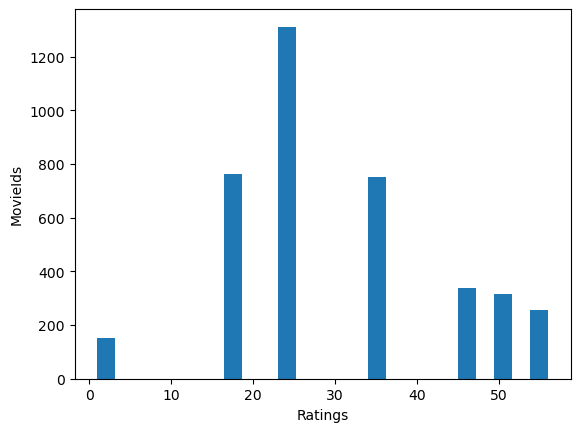

In [25]:
df_final.Age.plot.hist(bins=25)
plt.ylabel("MovieIds")
plt.xlabel("Ratings")

<Axes: xlabel='Rating'>

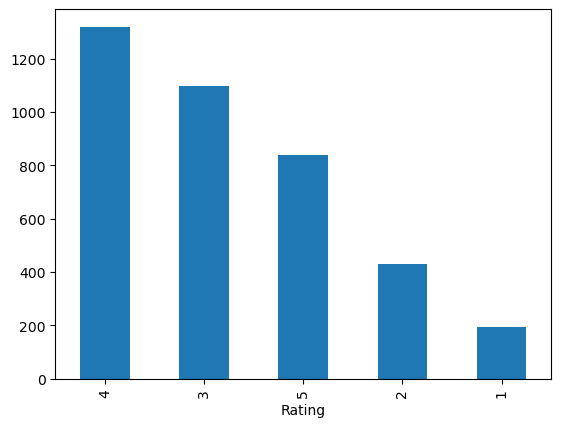

In [26]:
df_final['Rating'].value_counts().plot(kind='bar')

<Axes: xlabel='Age', ylabel='count'>

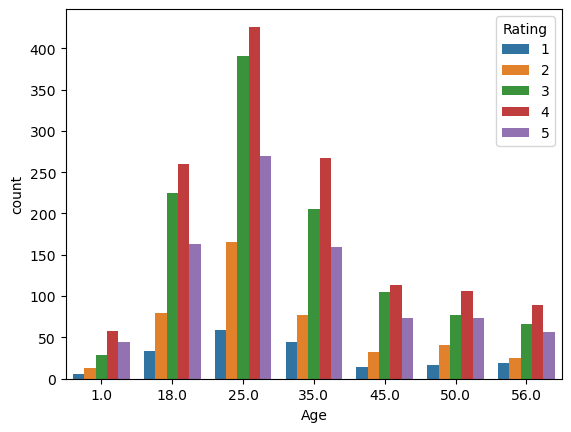

In [27]:
sns.countplot(x=df_final['Age'],hue=df_final['Rating'])

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [29]:
#Use the following features:movie id,age,occupation
features=df_final[['MovieID','Age','Gender']].values

#Use rating as label
labels=df_final[['Rating']].values

In [30]:
train, test, train_labels, test_labels = train_test_split(features,labels,test_size=0.33,random_state=42)

In [31]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(train, train_labels)
Y_pred = logreg.predict(test)
acc_log = round(logreg.score(train, train_labels) * 100, 2)
acc_log

C:\Users\Slim 5pro 9LIN\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Slim 5pro 9LIN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


33.45

In [32]:
#K Nearest Neighbour Classification
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train, train_labels)
Y_pred = knn.predict(test)
acc_knn = round(knn.score(train, train_labels) * 100, 2)
acc_knn

C:\Users\Slim 5pro 9LIN\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


60.05

In [33]:
#Decision Tress
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train, train_labels)
Y_pred = decision_tree.predict(test)
acc_decision_tree = round(decision_tree.score(train, train_labels) * 100, 2)
acc_decision_tree

100.0